# 1. What is nms?
NMS(non maximum suppression) is a selecting trick to find best bounding box among many bounding boxes for object detection problem. 

### 1.1 Demo 
Before nms:
![](bb1.jpg)
After nms:
![](bb2.jpg)

### 1.2 Motivation
Neighborhood should only have one bb, which is the best one in this neighborhood. Just like an old saying: _一山不容二虎_.

### 1.3  More thoughts on nms
1. Two essentials: **neighborhood** and **power measurement**.
2. How to define neighborhood? 
    1. Based on some measure, such as distance in spatial(1D, 2D) or feature space.
    2. The goal of neighborhood is to define a subset, in which only one bb exist.
3. How to define power measurement?
    1. Indensity in _canny_
    2. Probability     
    
# 2. How to nms?

### 2.1 Load data

In [3]:
import scipy.io as sio
boxes = sio.loadmat('bb1.mat')['total_boxes']
print boxes.shape
print boxes[0:4,:]

(27, 5)
[[  86.           21.          161.           96.            0.99980026]
 [  96.           27.          158.           89.            0.999201  ]
 [ 297.           96.          361.          159.            0.99896324]
 [ 298.           98.          370.          170.            0.99961412]]


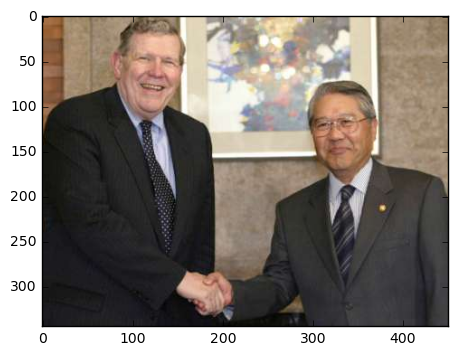

In [4]:
#import cv2
#cv2.startWindowThread()
#img = cv2.imread('test1.jpg')
#cv2.imshow('aa', img)

from matplotlib.pyplot import imshow
%matplotlib inline
import numpy as np
from PIL import Image 
img = Image.open('test1.jpg')
imshow(np.asarray(img))

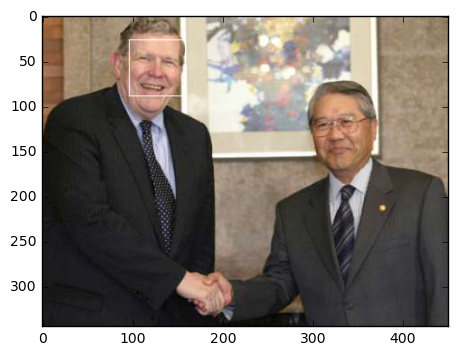

In [6]:
from PIL import ImageDraw
draw = ImageDraw.Draw(img)
draw.rectangle(boxes[1,0:4])
imshow(np.asarray(img))

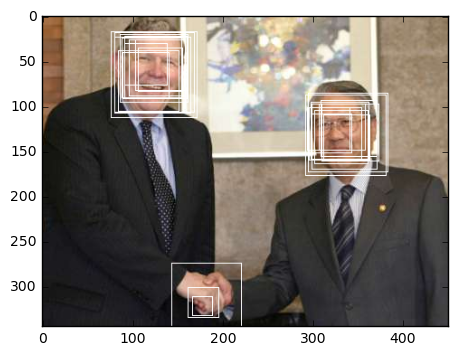

In [7]:
for i in range(boxes.shape[0]):
    draw.rectangle(boxes[i,0:4])
imshow(np.asarray(img))

# 2.2 nms
1. Computer area of each bb.
2. Find _the most powerful bb_.
3. Find _neighborhood_.
4. Suppression.

In [11]:
# 1. Computer area.
x1 = boxes[:,0]
y1 = boxes[:,1]
x2 = boxes[:,2]
y2 = boxes[:,3]
area = (x2-x1+1) * (y2-y1+1)
print area

[ 5776.  3969.  4160.  5329.  7921.  8100.  2450.  1980.  3969.   506.
  2704.  4489.  6084.  4624.  3600.  1190.  4900.  4096.  3192.  7832.
  2256.  7225.  2304.  2704.  9216.  2652.  3481.]


In [12]:
# 2. Find the most powerful bb
score = boxes[:,4]
I = score.argsort() # ascending
print "I:", I
print "score:",score[I[0]], score[I[1]], score[I[2]], "...", score[I[-1]]


I: [23 25  9 15 20 12  7 22 10  6 18  8 14 26 17  2 13  1 11  3 16 21  0 24  5
  4 19]
score: 0.722565 0.763902 0.813541 ... 0.999908


In [13]:

# 3. Find neighborhood
# neighborhood is defined by intersection area ratio
pick = []
while len(I) > 0:
    #tiger = I[-1]
    xx1 = np.maximum(x1[I[-1]], x1[I[0:-1]])
    yy1 = np.maximum(y1[I[-1]], y1[I[0:-1]])
    xx2 = np.minimum(x2[I[-1]], x2[I[0:-1]])
    yy2 = np.minimum(y2[I[-1]], y2[I[0:-1]])
    #inter = (xx2-xx1+1) * (yy2-yy1+1)
    w = np.maximum(0, (xx2-xx1+1))
    h = np.maximum(0, (yy2-yy1+1))
    inter = w*h
    ratio = inter/(area[I[-1]] + area[I[0:-1]] - inter)
    
    
    # 4. Suppression
    threshold = 0.7
    pick.append(I[-1])
    I = I[np.where(ratio <= threshold)[0]]
print "len of pick", len(pick)

len of pick 17


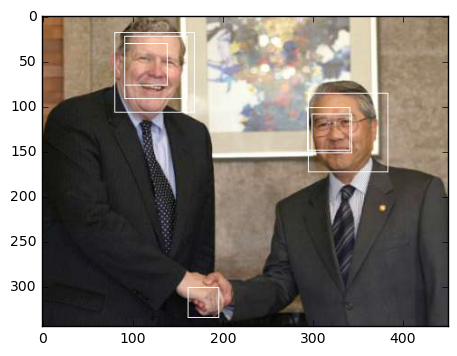

In [48]:
# Show result
boxes = boxes[pick, :]

img = Image.open('test1.jpg')
draw = ImageDraw.Draw(img)
for i in range(boxes.shape[0]):
    draw.rectangle(boxes[i,0:4])
imshow(np.asarray(img))